# Import libraries

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils import *

# Parameters

In [2]:
fig_dir = 'data/figure'
exp_name = 'compare_methods'
time_path = 'data/time/compare_methods_2020_12_11_1_9_14.npy'
cost_path = 'data/cost/compare_methods_2020_12_11_1_9_14.npy'
methods = ['greedy', 'optimal', 'approx', 'approx_woc']
sizes = np.arange(1, 11)
repeats = 10

# Load data

In [3]:
%%time
run_time = np.load(time_path)
travel_cost = np.load(cost_path)
print(run_time.shape, travel_cost.shape)

(40,) (40,)
Wall time: 9.97 ms


# Convert to DataFrame

In [4]:
df_time = pd.DataFrame(run_time.reshape(repeats,-1)/np.power(10, 6), columns=methods)
print(df_time.shape)
print(df_time.info())
display(df_time)

(10, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      10 non-null     float64
 1   optimal     10 non-null     float64
 2   approx      10 non-null     float64
 3   approx_woc  10 non-null     float64
dtypes: float64(4)
memory usage: 448.0 bytes
None


,greedy,optimal,approx,approx_woc
0,0.000097,39.673767,0.643496,0.146176
1,0.000100,38.495866,0.567446,0.061979
2,0.000000,38.237703,0.570053,0.055897
3,0.000200,37.800027,0.576660,0.069163
4,0.000000,38.913702,0.672084,0.121811
5,0.000000,36.874353,0.614021,0.109194
6,0.000202,36.645253,0.570916,0.057104
7,0.000000,36.426569,0.580641,0.062590
8,0.000000,37.325077,0.581530,0.073951
9,0.000000,36.717010,0.626700,0.075075


In [5]:
df_cost =  pd.DataFrame(travel_cost.reshape(repeats,-1), columns=methods)
print(df_cost.shape)
print(df_cost.info())
display(df_cost)

(10, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      10 non-null     float64
 1   optimal     10 non-null     float64
 2   approx      10 non-null     float64
 3   approx_woc  10 non-null     float64
dtypes: float64(4)
memory usage: 448.0 bytes
None


,greedy,optimal,approx,approx_woc
0,12108.3,9424.1,9717.0,9962.2
1,10662.0,8728.9,9005.9,9331.9
2,11312.8,9422.6,9528.4,10025.4
3,12240.0,9784.4,9987.0,10473.7
4,12158.0,9405.1,9573.7,9983.6
5,12706.0,9846.9,10376.0,10243.0
6,11429.7,9336.1,9634.2,10000.1
7,10858.1,8695.6,8915.3,9404.3
8,10843.5,8880.6,9025.9,9300.9
9,11480.1,9264.2,9508.5,9803.9


# Calculate metrics 

## Processing time

In [6]:
df_time.mean()

greedy         0.000060
optimal       37.710933
approx         0.600355
approx_woc     0.083294
dtype: float64

## Approximation ratio

In [7]:
df_cost.loc[:, 'approx_ratio'] = df_cost['approx']/df_cost['optimal']
df_cost.loc[:, 'approx_woc_ratio'] = df_cost['approx_woc']/df_cost['optimal']
df_cost.loc[:, 'greedy_ratio'] = df_cost['greedy']/df_cost['optimal']
display(df_cost)

,greedy,optimal,approx,approx_woc,approx_ratio,approx_woc_ratio,greedy_ratio
0,12108.3,9424.1,9717.0,9962.2,1.031080,1.057098,1.284823
1,10662.0,8728.9,9005.9,9331.9,1.031734,1.069081,1.221460
2,11312.8,9422.6,9528.4,10025.4,1.011228,1.063974,1.200603
3,12240.0,9784.4,9987.0,10473.7,1.020706,1.070449,1.250971
4,12158.0,9405.1,9573.7,9983.6,1.017926,1.061509,1.292703
5,12706.0,9846.9,10376.0,10243.0,1.053733,1.040226,1.290355
6,11429.7,9336.1,9634.2,10000.1,1.031930,1.071122,1.224248
7,10858.1,8695.6,8915.3,9404.3,1.025266,1.081501,1.248689
8,10843.5,8880.6,9025.9,9300.9,1.016362,1.047328,1.221032
9,11480.1,9264.2,9508.5,9803.9,1.026370,1.058257,1.239190


In [8]:
df_cost[['approx_ratio', 'approx_woc_ratio', 'greedy_ratio']].mean()

approx_ratio        1.026633
approx_woc_ratio    1.062054
greedy_ratio        1.247407
dtype: float64

## Ride-sharing efficiency

In [9]:
df_cost.loc[:, 'approx_gain'] = df_cost['greedy']/df_cost['approx']
df_cost.loc[:, 'approx_woc_gain'] = df_cost['greedy']/df_cost['approx_woc']
df_cost.loc[:, 'optimal_gain'] = df_cost['greedy']/df_cost['optimal']
display(df_cost)

,greedy,optimal,approx,approx_woc,approx_ratio,approx_woc_ratio,greedy_ratio,approx_gain,approx_woc_gain,optimal_gain
0,12108.3,9424.1,9717.0,9962.2,1.031080,1.057098,1.284823,1.246094,1.215424,1.284823
1,10662.0,8728.9,9005.9,9331.9,1.031734,1.069081,1.221460,1.183891,1.142533,1.221460
2,11312.8,9422.6,9528.4,10025.4,1.011228,1.063974,1.200603,1.187272,1.128414,1.200603
3,12240.0,9784.4,9987.0,10473.7,1.020706,1.070449,1.250971,1.225593,1.168641,1.250971
4,12158.0,9405.1,9573.7,9983.6,1.017926,1.061509,1.292703,1.269937,1.217797,1.292703
5,12706.0,9846.9,10376.0,10243.0,1.053733,1.040226,1.290355,1.224557,1.240457,1.290355
6,11429.7,9336.1,9634.2,10000.1,1.031930,1.071122,1.224248,1.186367,1.142959,1.224248
7,10858.1,8695.6,8915.3,9404.3,1.025266,1.081501,1.248689,1.217918,1.154589,1.248689
8,10843.5,8880.6,9025.9,9300.9,1.016362,1.047328,1.221032,1.201376,1.165855,1.221032
9,11480.1,9264.2,9508.5,9803.9,1.026370,1.058257,1.239190,1.207351,1.170973,1.239190


In [10]:
df_cost[['approx_gain', 'approx_woc_gain', 'optimal_gain']].mean()

approx_gain        1.215036
approx_woc_gain    1.174764
optimal_gain       1.247407
dtype: float64

In [11]:
df_cost[['greedy', 'optimal', 'approx', 'approx_woc']].mean()

greedy        11579.85
optimal        9278.85
approx         9527.19
approx_woc     9852.90
dtype: float64

# Plots

## Processing time

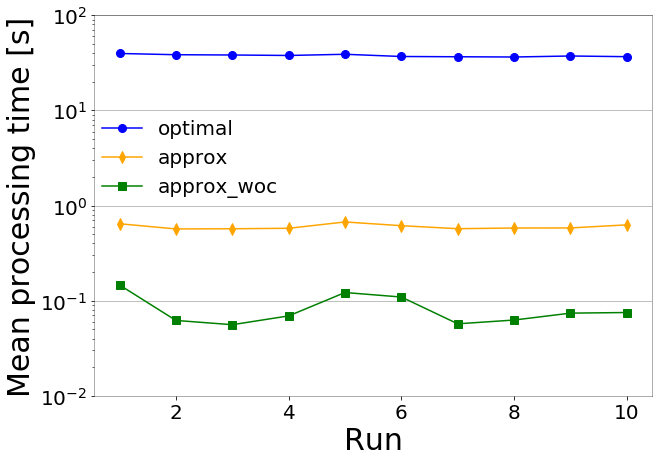

In [12]:
plot_proc_time(
    df_time, 
    sizes, 
    exp_name, 
    ylim=(10**-2, 10**2),
    plot_optimal=True
)

## Travel cost

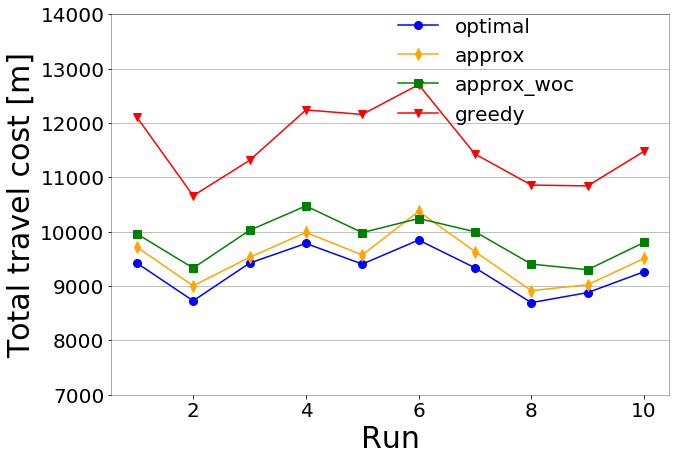

In [13]:
plot_travel_cost(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(7000,14000),
    plot_optimal=True
)

## Approximation ratio

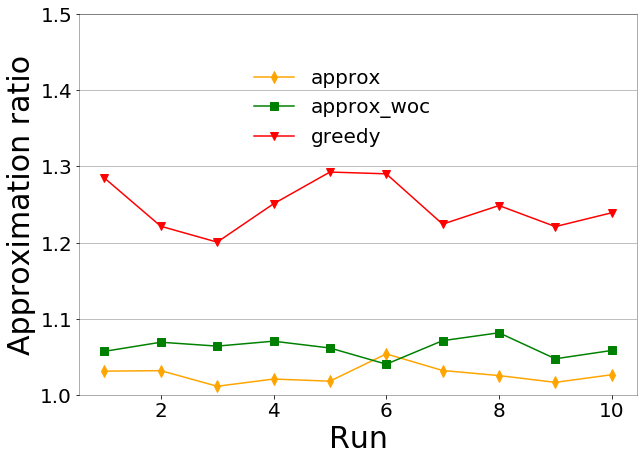

In [14]:
plot_approx_ratio(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(1.,1.5)
)

## Ride-sharing efficiency

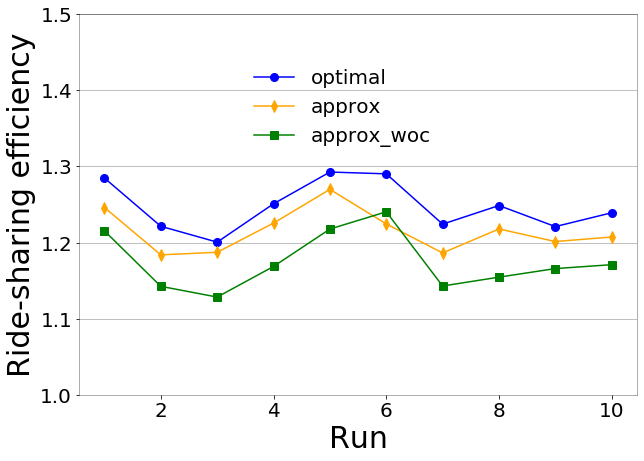

In [15]:
plot_rs_efficiency(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(1.,1.5),
    plot_optimal=True
)